#importing libraries

In [5]:
#import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#importing dataframe

In [2]:
path = r'/Users/office/Desktop/Instacart Basket Analysis'

In [4]:
df_ords_customers = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_customers_left.pkl'))
df_ords_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 33 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   order_id                int64         
 1   user_id                 object        
 2   order_number            int64         
 3   orders_day_of_week      int64         
 4   order_hour_of_day       int64         
 5   days_since_prior_order  float64       
 6   product_id              int64         
 7   add_to_cart_order       int64         
 8   reordered               int64         
 9   product_name            object        
 10  aisle_id                int64         
 11  department_id           int64         
 12  prices                  float64       
 13  price_range_loc         object        
 14  busiest day             object        
 15  busiest_days            object        
 16  busiest_period_of_day   object        
 17  max_order               int64         
 18  

#creating a barchart

<Axes: xlabel='orders_day_of_week'>

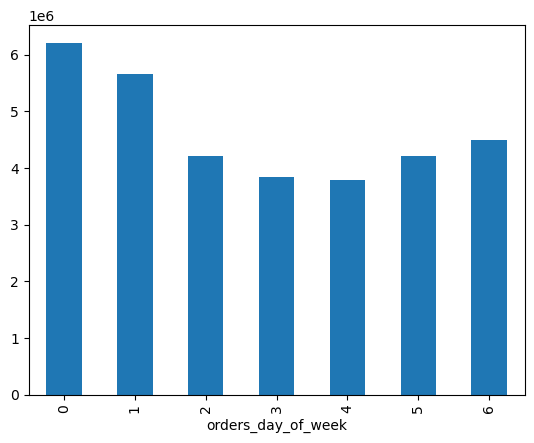

In [7]:
#create a barchart for orders_day_of_week

df_ords_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()

#Eporting bar chart

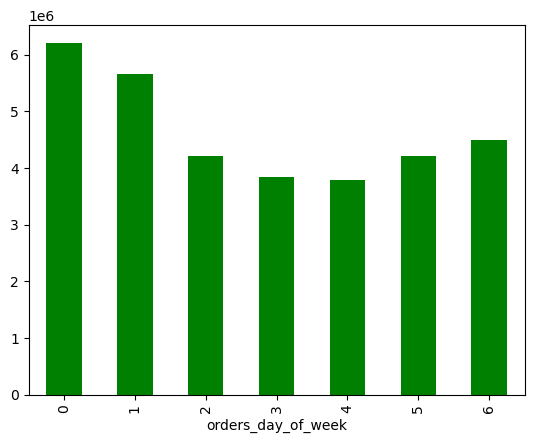

In [10]:
#save bar chart

bar_odow = df_ords_customers['orders_day_of_week'].value_counts().sort_index().plot.bar(color=['green'])

In [11]:
#Export barchart for orders_day_of_week

bar_odow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_dow.png'))

#creating scatterplot for the 'prices' column

<Axes: xlabel='prices', ylabel='prices'>

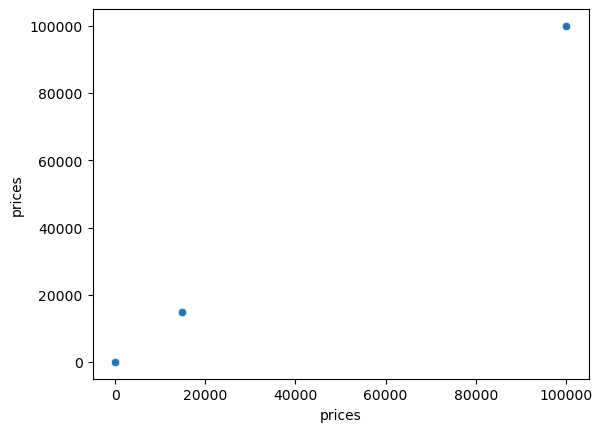

In [16]:
#create a scatterplot

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_customers)

In [17]:
df_ords_customers.loc[df_ords_customers['prices'] > 100]


,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first name,last name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
7816,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,2020-03-04,0,divorced/widowed,177864,both
7817,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,2020-03-04,0,divorced/widowed,177864,both
15172,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,2018-11-11,2,married,230074,both
20294,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,2019-10-06,2,married,233776,both
20528,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,2019-08-23,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,nan,Gould,Male,Rhode Island,58,2019-01-25,1,married,207497,both
32337105,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,2018-08-04,0,single,86490,both
32340034,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,2019-05-08,2,married,195077,both
32359285,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,2017-01-18,2,married,398880,both


In [18]:
df_ords_customers.loc[df_ords_customers['prices'] >100, 'prices'] = np.nan

In [20]:
df_ords_customers['prices'].max()

25.0

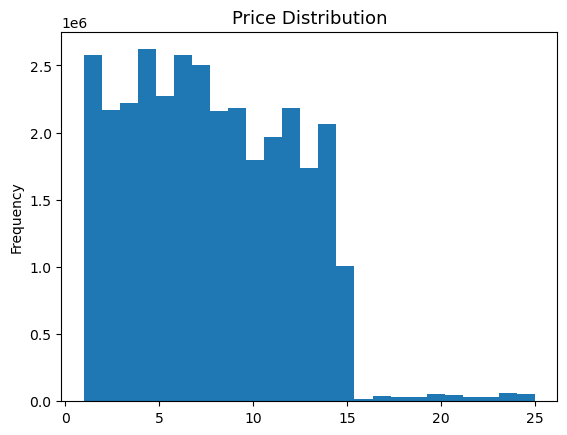

In [21]:
#create histogram

plt.title('Price Distribution', fontsize=13)
hist_prices = df_ords_customers['prices'].plot.hist(bins=25)

#Exporting histogram

In [22]:
#Export histogram for Price distribution

hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','prices_hist.png'))

#creating sample for line chart

In [24]:
np.random.seed(4)
dev = np.random.rand(len(df_ords_customers)) <= 0.7

In [26]:
#store 70% of the sample in the dataframe big

big = df_ords_customers[dev]

In [27]:
#store 30% of the sample in the dataframe small


small = df_ords_customers[~dev]

In [28]:
len(df_ords_customers)

32434212

In [29]:
len(big) + len(small)

32434212

In [30]:
df_2 = small[['orders_day_of_week','prices']]

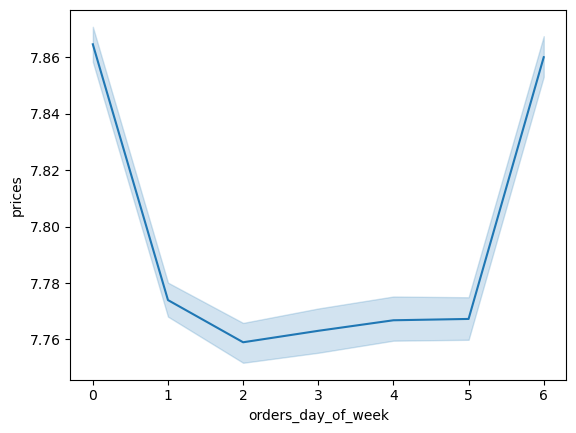

In [31]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

#Exporting line chart

In [32]:
#Export line chart

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_orders_days_vs_prices.png'))

#Descriptive Analysis

In [33]:
df_ohod = df_ords_customers[['order_hour_of_day']]

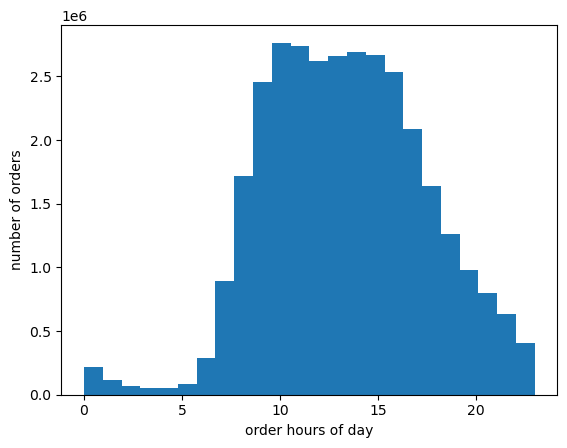

In [35]:
#create histogram for 'order_hour_of_day' column

hist_ohod = df_ohod['order_hour_of_day'].plot.hist(bins=24, xlabel='order hours of day', ylabel='number of orders')

#Exporting the histogram

In [36]:
hist_ohod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_orders_hours_distribution.png'))

1. The histogram shows that highest number of orders is by 10am
2. The peak hours for highest number of orders is between 10am - 3pm
3. The minimum numbers of orders is between 12am - 5am

#Checking the distribution of orders among customers using the 'loyalty flag'

Text(0.5, 1.0, 'Customer Loyalty vs Number of Orders')

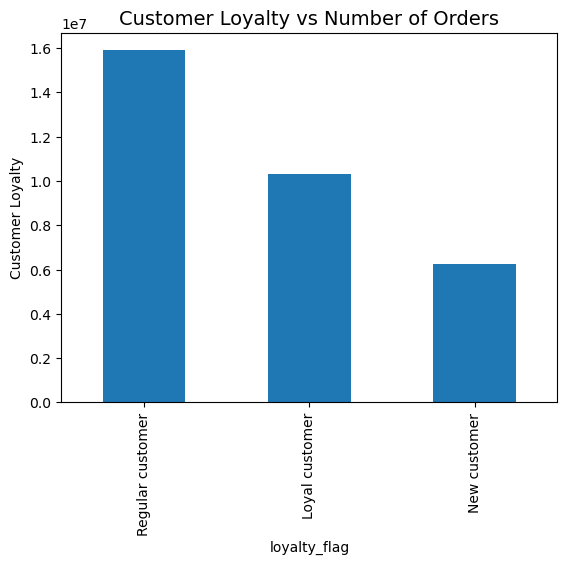

In [38]:
# create barchart with loyalty flag vs count of orders per loyalty flag


bar_loyal = df_ords_customers['loyalty_flag'].value_counts().plot.bar(ylabel="Customer Loyalty", x="Number of Orders")

plt.title("Customer Loyalty vs Number of Orders", fontsize=14)

#Exporting bar chart

In [39]:
bar_loyal.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_loyalty_flag_distribution.png'))

#Analyse Order Hours of Day vs Prices

In [40]:
# extract relevant columns and check the dataframe


df_small_ohod_prices = small[['order_hour_of_day', 'prices']]
df_small_ohod_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


#creating a line to show correlation between order_hour_of_day and 'prices'

Text(0.5, 1.0, 'Order hours of the day vs prices')

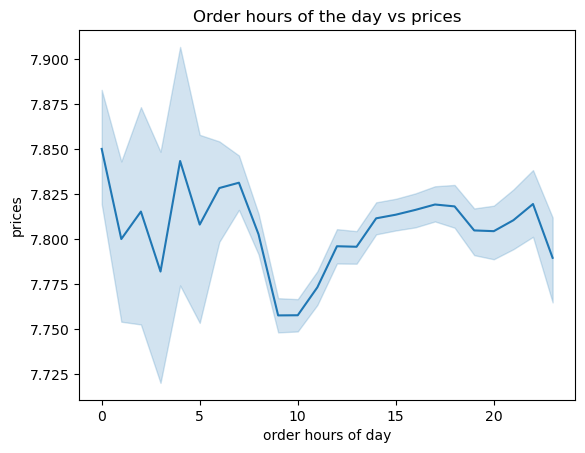

In [41]:
#create a line chart

line_ohod_prices = sns.lineplot(data=df_small_ohod_prices, x='order_hour_of_day', y='prices')
line_ohod_prices.set(xlabel='order hours of day')
plt.title('Order hours of the day vs prices')

1. The expenditure is highest by 4am
2. The peak time period for expenditure is between 10pm and 7am

Age vs Number_of_dependants

In [43]:
# Extract age and depenandants into a dataframe


df_age_dependants = df_ords_customers[['age','n_dependants']]
df_age_dependants.head()

,age,n_dependants
0,31,3
1,31,3
2,31,3
3,31,3
4,31,3


Text(0.5, 1.0, 'Age vs Number of Dependants')

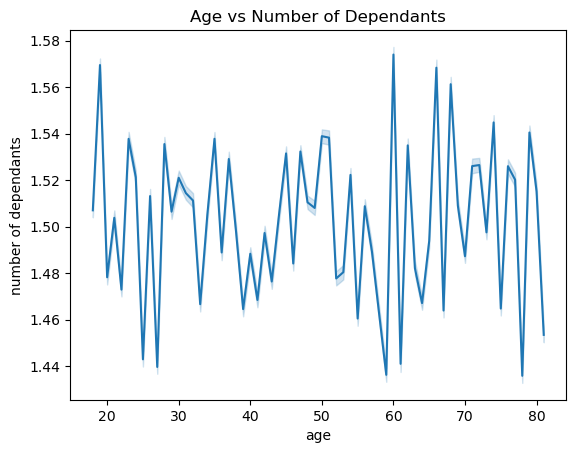

In [44]:
# create a line chart to check for correlation


line_age_ndependants = sns.lineplot(data=df_age_dependants, x='age', y='n_dependants')
line_age_ndependants.set(xlabel='age', ylabel='number of dependants')
plt.title('Age vs Number of Dependants')


In [45]:
#Export line chart

line_age_ndependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','line_age_ndependants.png'))

#There is no correlation between age and number of dependants

#Age vs Income(spending power)

In [46]:
# Extract age and income into a separate dataframe


df_age_income = df_ords_customers[['age', 'income']]
df_age_income.head()

,age,income
0,31,40423
1,31,40423
2,31,40423
3,31,40423
4,31,40423


[Text(0.5, 0, 'age'), Text(0, 0.5, 'income')]

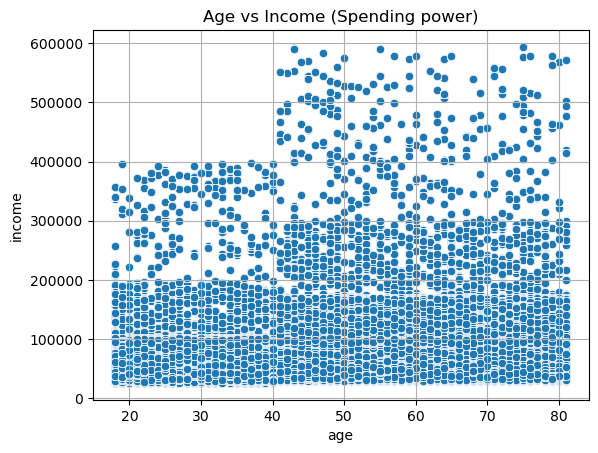

In [47]:
# Create a scatterplot to see the correlation between age and income


scatter_age_income = sns.scatterplot(x='age', y='income', data=df_age_income)
plt.grid()
plt.title('Age vs Income (Spending power)')
scatter_age_income.set(xlabel='age', ylabel='income')

In [48]:
#Export scatterplot

scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','scatter_age_income.png'))

1. the ages above 40 have more spending power than below 40
2. the ages below 40 dont earn more 400,000 but above 40 earn more than 400,000
3. few customers below 40 earn between 200,000 to 300,000 but alot of above 40 earn between 200,000 and 300,000